# iris Data Keras Modeling

* Colab File Upload
 - iris.csv

In [0]:
!ls -l

total 8
-rw-r--r-- 1 root root 3867 Feb 20 01:37 iris.csv
drwxr-xr-x 1 root root 4096 Feb  5 18:37 sample_data


* pandas DataFrame

In [0]:
import pandas as pd

iris = pd.read_csv('iris.csv')

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [0]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# I. Data Preprocessing

> ## 1) iris.Species 빈도분석

* Species : setosa, virginica, versicolor

In [0]:
iris.Species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

> ## 2) DataFrame to Array & Casting

In [0]:
iris_TR = iris.values

iris_TR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

* object to float

In [0]:
TR_X = iris_TR[:,0:4].astype(float)
TR_Y = iris_TR[:,4]

TR_X.shape, TR_Y.shape

((150, 4), (150,))

> ## 3) Normalization with Keras

* normalize( )

In [0]:
import keras

TR_XN = keras.utils.normalize(TR_X)

TR_XN

Using TensorFlow backend.


array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

> ## 4) One Hot Encoding with sklearn Package & Keras

* ['setosa', 'virginica', 'virsicolor'] to [0, 1, 2]

In [0]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
encoder.fit(TR_Y)
TR_YL = encoder.transform(TR_Y)

TR_YL

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* to_categorical( )

In [0]:
TR_YO = keras.utils.to_categorical(TR_YL)

TR_YO

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

> ## 5) Train & Test Split with sklearn Package

* 8:2

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(TR_XN, TR_YO, 
                                                    test_size = 0.2, 
                                                    random_state = 2045) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

# II. Keras Modeling

> ## 1) Keras models & layers Import

In [0]:
from keras import models
from keras import layers

> ## 2) Model Define

* 모델 신경망 구조 정의

In [0]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

* 모델 구조 확인

In [0]:
Model_iris.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


> ## Softmax Activation

> ### (1) sigmoid( ) & softmax( ) 정의

* sigmoid( )

In [0]:
import numpy as np

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

* sigmoid( ) 시각화

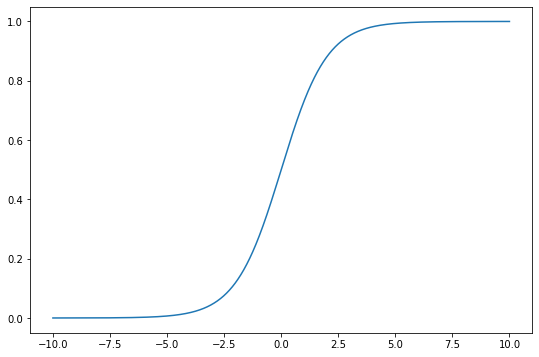

In [0]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (9, 6))
plt.plot(n, sigmoid(n))
plt.show()

* softmax( )

In [0]:
def softmax(x):
    m = np.max(x)
    sm = np.exp(x - m)/np.sum(np.exp(x - m))
    return(sm)

* softmax( ) 시각화

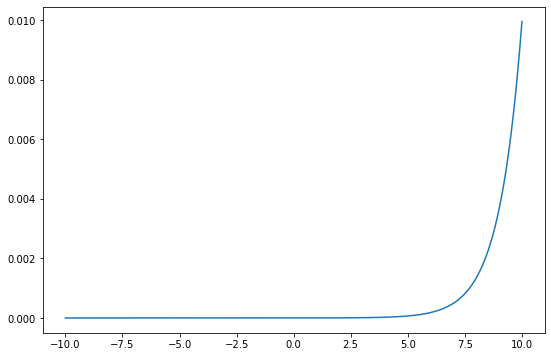

In [0]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (9, 6))
plt.plot(n, softmax(n))
plt.show()

> ### (2) sigmoid( ) vs. softmax( ) 결과 비교

* 가상의 y_hat

In [0]:
y_hat = np.array([5, 0, -3])

* Sigmoid Activation 적용

In [0]:
np.set_printoptions(suppress = True, precision = 5)

print(sigmoid(y_hat))
print('%.5f' % np.sum(sigmoid(y_hat)))

[0.99331 0.5     0.04743]
1.54073


* Softmax Activation 적용

In [0]:
np.set_printoptions(suppress = True)

print(softmax(y_hat))
print('%.5f' % np.sum(softmax(y_hat)))

[0.99298 0.00669 0.00033]
1.00000


> ### (3) 추가 학습 진행 후 변화 비교

* 가상의 y_hat 업데이트

In [0]:
y_hat = np.array([10, -5, -9])

* Sigmoid Activation 재적용

In [0]:
print(sigmoid(y_hat))
print('%.5f' % np.sum(sigmoid(y_hat)))

[0.99995 0.00669 0.00012]
1.00677


* Softmax Activation 재적용

In [0]:
print(softmax(y_hat))
print('%.5f' % np.sum(softmax(y_hat)))

[1. 0. 0.]
1.00000


> ## 3) Model Compile

* 모델 학습방법 설정

In [0]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'rmsprop',
                   metrics = ['accuracy'])

> ## 4) Model Fit

* 모델 학습 수행

In [0]:
History_iris = Model_iris.fit(x_train, y_train,
                              epochs = 500,
                              batch_size = 7,
                              validation_data = (x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 120 samples, validate on 30 samples
Epoch 1/500





120/120 [==============================] - 1s 5ms/step - loss: 1.0944 - acc: 0.4750 - val_loss: 1.0863 - val_acc: 0.4333
Epoch 2/500
120/120 [==============================] - 0s 359us/step - loss: 1.0906 - acc: 0.3750 - val_loss: 1.0854 - val_acc: 0.7000
Epoch 3/500
120/120 [==============================] - 0s 255us/step - loss: 1.0871 - acc: 0.6000 - val_loss: 1.0812 - val_acc: 0.7000
Epoch 4/500
120/120 [==============================] - 0s 275us/step - loss: 1.0831 - acc: 0.6417 - val_loss: 1.0755 - val_acc: 0.6667
Epoch 5/500
120/120 [==============================] - 0s 257us/step - loss: 1.0795 - acc: 0.5333 - val_loss: 1.0730 - val_acc: 0.7333
Epoch 6/500
120/120 [==============================] - 0s 241us/step - loss: 1.0752 - acc: 0.6250 - val_loss: 1.0658 - val_acc: 0.7000
Epoch 7/500
120/120 [========================

> ## 5) 학습 결과 시각화

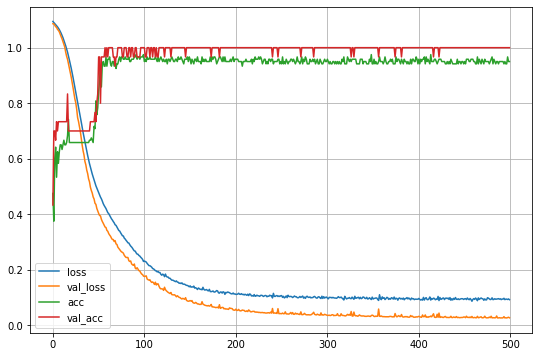

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['acc'])
plt.plot(History_iris.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [0]:
loss, accuracy = Model_iris.evaluate(x_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

30/30 [==============================] - 0s 94us/step
Loss = 0.03
Accuracy = 1.00


> ## 7) Model Predict

* Probability

In [0]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)

Model_iris.predict(x_test)

array([[1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.00012, 0.99985, 0.00003],
       [0.     , 0.00087, 0.99913],
       [1.     , 0.     , 0.     ],
       [0.     , 0.99965, 0.00035],
       [0.     , 0.00982, 0.99018],
       [1.     , 0.     , 0.     ],
       [0.     , 0.00337, 0.99663],
       [1.     , 0.     , 0.     ],
       [0.     , 0.66346, 0.33654],
       [0.     , 0.02378, 0.97622],
       [0.     , 0.98717, 0.01283],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.     , 0.97812, 0.02188],
       [0.     , 0.95145, 0.04855],
       [1.     , 0.     , 0.     ],
       [0.     , 0.99852, 0.00148],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.     , 0.00973, 0.99027],
       [1.     , 0.     , 0.     ],
       [0.     , 0.19416, 0.80584],
       [0.     , 0.00082, 0.99918],
       [1.     , 0.     , 0.     ],
       [0.     , 0.99389, 0.

* Class

In [0]:
y_hat = Model_iris.predict_classes(x_test)

y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

* One-Hot Encoding to Array
 * np.argmax( ) : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
 * axis = 1 : 열기준

In [0]:
y = np.argmax(y_test, axis = 1)

y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

* Confusion Matrix & Claasification Report

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [0]:
print(classification_report(y, y_hat, 
                            target_names = ['setosa',
                                            'virginica',
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# III. Model Save & Load

> ## 1) File System

* Save to Colab File System

In [0]:
!ls -l

total 8
-rw-r--r-- 1 root root 3867 Feb 20 01:37 iris.csv
drwxr-xr-x 1 root root 4096 Feb  5 18:37 sample_data


In [0]:
Model_iris.save('Model_iris.h5')

!ls -l

total 32
-rw-r--r-- 1 root root  3867 Feb 20 01:37 iris.csv
-rw-r--r-- 1 root root 22464 Feb 20 01:58 Model_iris.h5
drwxr-xr-x 1 root root  4096 Feb  5 18:37 sample_data


* Download Colab File System to Local File System

In [0]:
from google.colab import files

files.download('Model_iris.h5')

* Load from Colab File System

In [0]:
from keras.models import load_model

Model_local = load_model('Model_iris.h5')

Model_local.predict_classes(x_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

> ## 2) Google Drive

* Mount Google Drive

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


* Check Mounted_Drive

In [0]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 5
drwx------ 2 root root 4096 Nov 23 21:17 dogs_and_cats_small
-rw------- 1 root root  741 Nov 22 03:07 PII.csv


In [0]:
import pandas as pd

DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')

DF.head(3)

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2


* Save to Mounted Google Drive Directory

In [0]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [0]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 22
-rw------- 1 root root 22464 Feb 20 01:59 001_Model_iris.h5


* Load from Mounted Google Drive Directory

In [0]:
from keras.models import load_model

Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

Model_google.predict_classes(x_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

# 
# 
# 
# The End
# 
# 
# 